### This jupyter notebook is to unit-test CFE model run

## Preparation

In [11]:
# Import modules
import json
from bmi_cfe import BMI_CFE

In [12]:
# Input: Mahurangi data for 3 yrs
# forcing: Mahurangi/mahurangi_1998_2001.csv
# observed: test_sm_basinavg

# Input: Little Washita data for 12 yrs
# forcing: LittleWashita/little_washita_2006_2012.csv
# observed: test_sm_basinavg


# Parameter: only limited number of parameters

# 	Unnamed: 0	like1	parbb	parsatdk	parsatpsi	parslop	parsmcmax	parwltsmc	parmax_gw_storage	parCgw	parexpon	parK_nash	parrefkdt	partrigger_z_fact	paralpha_fc	parK_lf	parnum_nash_storage
# 978	978	0.921414	2.553518	0.000147	0.0691	0.007217	0.552437	0.38771	343.449845	8.484384	1.821161	0.0013	3.620361	0.75	0.13743	0.000424	4.058391
# 983	983	0.921414	2.553518	0.000147	0.0691	0.007217	0.552437	0.38771	343.449845	8.484384	1.821161	0.0013	3.620361	0.75	0.13743	0.000424	4.058391
# 996	996	0.921414	2.553518	0.000147	0.0691	0.007217	0.552437	0.38771	343.449845	8.484384	1.821161	0.0013	3.620361	0.75	0.13743	0.000424	4.058391
# 997	997	0.921414	2.553518	0.000147	0.0691	0.007217	0.552437	0.38771	343.449845	8.484384	1.821161	0.0013	3.620361	0.75	0.13743	0.000424	4.058391

input_json = '../../data/unit_test/config_cfe.json'
params = {
    "forcing_file": "G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Mahurangi/forcing_hourly_1998_2001.csv", 
    "catchment_area_km2": 46.65, 
    "soil_params": {
        "bb": 2.553518, 
        "satdk": 0.000147, 
        "slop": 0.007217, 
        "satpsi": 0.0691, 
        "smcmax": 0.552437, 
        "wltsmc": 0.38771, 
        "D": 1
        }, 
        "alpha_fc": 0.13743, 
        "max_gw_storage": 343.449845, 
        "Cgw": 8.484384, 
        "expon": 1.821161, 
        "K_lf": 0.000424, 
        "refkdt": 3.620361, 
        "K_nash": 0.0013, 
        "trigger_z_fact": 0.75, 
        "num_nash_storage": 2, 
        "giuh_ordinates": [0.1, 0.2, 0.4, 0.2, 0.1], 
        "stand_alone": 1, 
        "unit_test": 1, 
        "time_step_size": 3600,
        "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Mahurangi/test_hourly_1998_2001_sm_basinavg.csv"
        }

with open(input_json, 'w') as outfile:
    json.dump(params, outfile, indent=4)

with open(input_json) as outfile:
    loaded_data = json.load(outfile)

## Run the model

In [13]:
cfe_instance = BMI_CFE(input_json)
cfe_instance.initialize()
cfe_instance.run_unit_test(
    plot=True,
    print_fluxes=False,
    plot_lims=list(range(1, 31062)),
    warm_up=True,
    warmup_offset=8000,
    warmup_iteration=10
)
cfe_instance.finalize(print_mass_balance=True)

TypeError: array() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def exp_model(t, S, max_gw_storage, Cgw, expon):
    return Cgw * (np.exp(expon*S/max_gw_storage) - 1 )

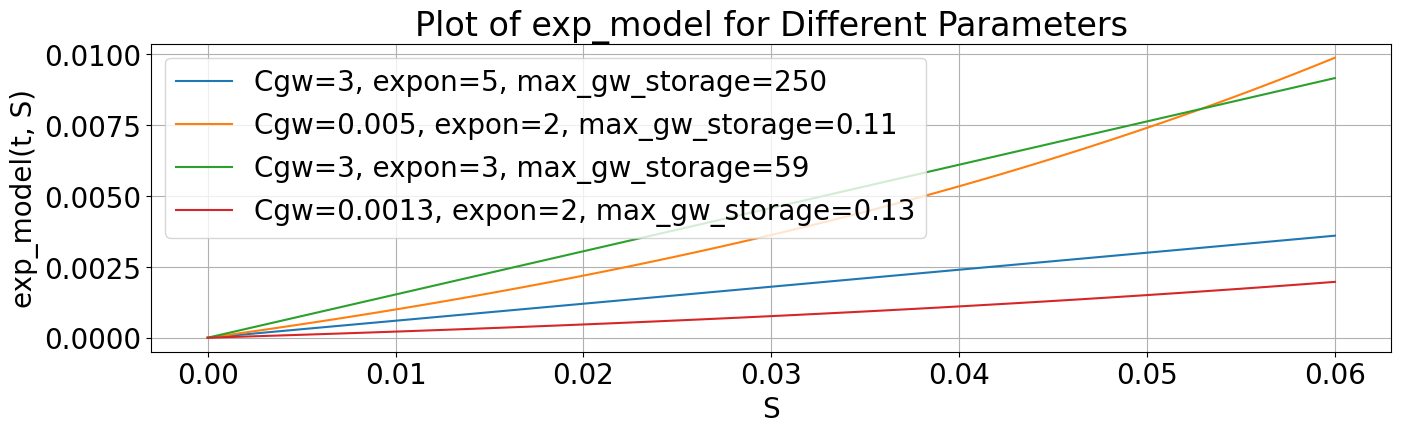

In [17]:
# Define a range of values for the independent variable S
S_values = np.linspace(0, 0.06, 100)  # Adjust the range and number of points as needed

# Define different sets of parameters
parameter_sets = [
    {'max_gw_storage': 250, 'Cgw': 3, 'expon': 5},
    {'max_gw_storage': 0.11, 'Cgw': 0.005, 'expon': 2},
    {'max_gw_storage': 59, 'Cgw': 3, 'expon': 3},
    {'max_gw_storage': 0.13, 'Cgw': 0.0013, 'expon': 2},
    # {'max_gw_storage': 0.4, 'Cgw': 1.7, 'expon': 5},
]

# Plot the function for each parameter set
for params in parameter_sets:
    Cgw = params['Cgw']
    expon = params['expon']
    max_gw_storage = params['max_gw_storage']
    plt.plot(S_values, exp_model(S_values, S_values, max_gw_storage, Cgw, expon), label=f'Cgw={Cgw}, expon={expon}, max_gw_storage={max_gw_storage}')

# Customize the plot
plt.xlabel('S')
plt.ylabel('exp_model(t, S)')
plt.title('Plot of exp_model for Different Parameters')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()